In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

Using TensorFlow backend.


In [60]:
import matplotlib as mpl
mpl.style.use('bmh')

In [2]:
X = hwd_X
scaler = StandardScaler().fit(X)
X = (X - scaler.mean_) / np.sqrt(scaler.var_)
X['input1'] = 0
X['input40'] = 0

y = hwd_y

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [3]:
X.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
0,0,0.793133,0.129863,0.748317,0.094508,-0.815851,-0.410972,-0.132062,-0.035424,1.622966,...,-0.761830,-0.197899,-0.018868,-0.303102,0.047703,0.462445,-0.919036,-0.983796,-0.517244,-0.179136
1,0,-0.343381,0.985972,0.983303,-1.250136,-0.993451,-0.410972,-0.132062,-0.035424,1.622966,...,-0.150393,-0.197899,-0.018868,-0.303102,0.844405,0.922516,0.688929,-0.639861,-0.517244,-0.179136
2,0,-0.343381,0.557918,0.748317,0.990937,1.315342,-0.410972,-0.132062,-0.035424,-0.313430,...,-0.761830,-0.197899,-0.018868,-0.303102,0.645229,0.462445,-2.326006,-1.155764,-0.517244,-0.179136
3,0,-0.343381,-1.154300,-2.071514,-0.129599,1.848140,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,-2.528016,0.688929,-0.811828,-0.517244,-0.179136
4,0,-0.343381,-0.084164,0.513331,-1.698350,-0.993451,-0.410972,-0.132062,-0.035424,-0.636162,...,1.683918,-0.197899,-0.018868,-0.303102,-0.350648,0.002374,0.487933,0.048010,-0.517244,-0.179136


# 1. Clustering

## K-Means

### How to determine the number of clusters (k)

Text(0, 0.5, 'BSS / TSS')

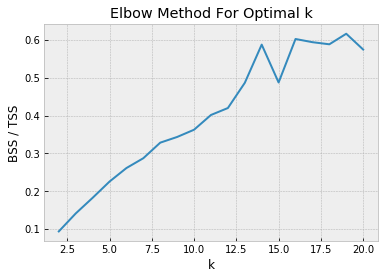

In [61]:
# Elbow Method
pes, wgs = elbow_method(X, 2, 21)
# plt.figure()
# plt.plot(range(2, 12), wgs)
# plt.title('Elbow Method For Optimal k')
# plt.xlabel('k')
# plt.ylabel('WSS')

plt.figure()
plt.plot(range(2, 21), pes)
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('BSS / TSS')
# k = 14

Optimal clusters:  19


Text(0.5, 1.0, 'Gap Values by Cluster Count')

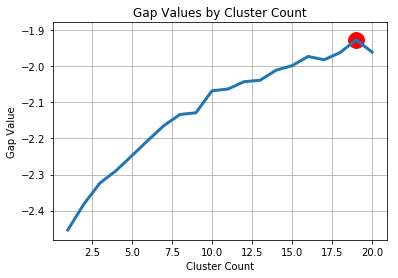

In [467]:
# Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X.values, cluster_array=np.arange(1, 21))   # random actually
print('Optimal clusters: ', n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optim alK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
# k = 20

### Visualization of clustering results
- a description of the kind of clusters that you got
- Why did you get the clusters you did? Do they make "sense"?
- Compare and contrast the different algorithms
- What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose?
    - [ref1](https://stats.stackexchange.com/questions/79028/performance-metrics-to-evaluate-unsupervised-learning)
    - [ref2](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


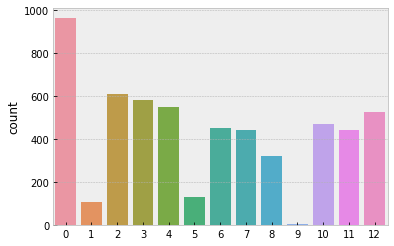

<Figure size 432x288 with 0 Axes>

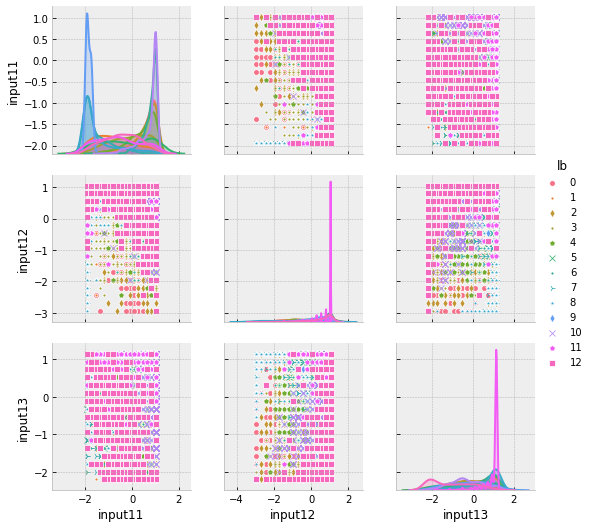

In [62]:
k = 13   # k diff, choose smaller one
clstr = KMeans(n_clusters=k, random_state=0, verbose=0)
clstr.fit(X)
lb = clstr.labels_
sns.countplot(lb)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)
col_names = X.columns
X_c = X.copy()
X_c['lb'] = lb
plt.figure()
ax = sns.pairplot(X_c, hue='lb', x_vars=col_names[10:13], y_vars=col_names[10:13], markers=[marker_set[i] for i in idx])

### comparison between original labels and clustering labels

In [486]:
y.shape[0]

5620

In [488]:
np.sum(y.values == lb) / y.shape[0]

0.11672597864768683

## Expectation Maximization

### How to determine the number of clusters (k)
- BIC Criterion
    - select model based on covariance types and the number of clusters
    - [ref1](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html)

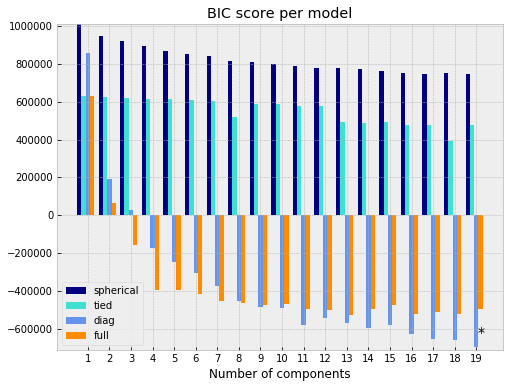

In [63]:
gauss_mix_model_selection(X, k_ub=20, cv_types=['spherical', 'tied', 'diag', 'full'])   # k = 17

### Visualization of clustering results
- a description of the kind of clusters that you got
- Why did you get the clusters you did? Do they make "sense"?
- Compare and contrast the different algorithms
- What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose?
    - [ref1](https://stats.stackexchange.com/questions/79028/performance-metrics-to-evaluate-unsupervised-learning)
    - [ref2](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


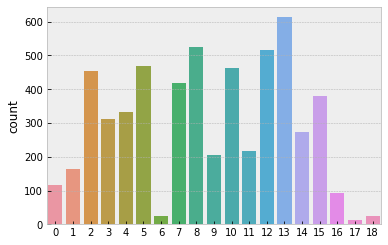

<Figure size 432x288 with 0 Axes>

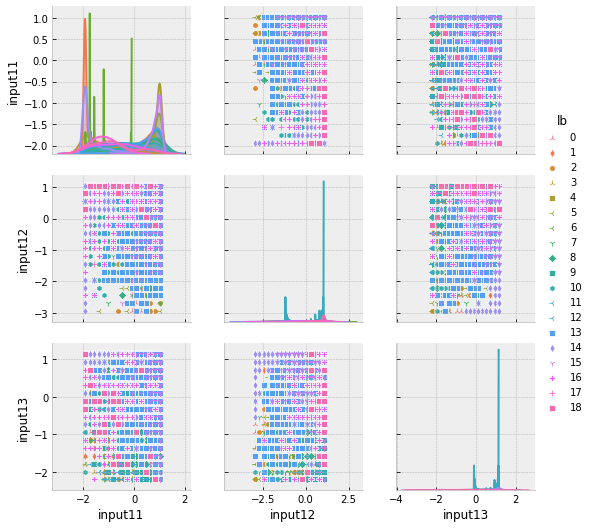

In [65]:
k = 19
gmm = GaussianMixture(n_components=k, warm_start=True)
lb = gmm.fit_predict(X)
sns.countplot(lb)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)
col_names = X.columns
X_c = X.copy()
X_c['lb'] = lb
plt.figure()
ax = sns.pairplot(X_c, hue='lb', x_vars=col_names[10:13], y_vars=col_names[10:13], markers=[marker_set[i] for i in idx])

# 2. Dimensionality Reduction

## PCA

In [67]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
# print('explained variance: ', pca.explained_variance_)
# print('explained variance ratio: ', pca.explained_variance_ratio_)
evr = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Cumulative Distribution of Variances(Eigenvalues)')

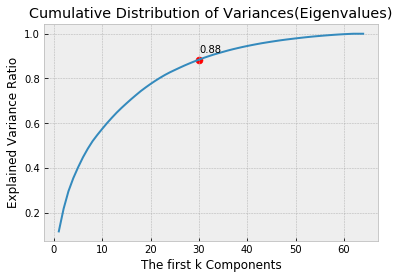

In [68]:
cum_evr = evr.cumsum()
ind = range(1, evr.shape[0]+1)
plt.plot(ind, cum_evr)
plt.text(30, cum_evr[29]+0.03, f'{cum_evr[29]:.2f}')
plt.scatter(30, cum_evr[29], s=50, c='r')
plt.xlabel('The first k Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Distribution of Variances(Eigenvalues)')

In [69]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_pca

(5620, 30)


array([[ 0.29663308, -1.44644806,  3.86303718, ...,  1.25555734,
         0.10192454, -0.03906365],
       [ 0.15671792, -3.06568663,  5.81166217, ...,  0.72722789,
         0.43585872, -0.4117375 ],
       [ 0.75393211,  3.26195091, -0.77966225, ...,  0.10126681,
        -0.13180994,  0.3701101 ],
       ...,
       [ 0.79373917, -0.62234189, -2.54096201, ...,  0.28816158,
         0.34067594,  0.07530654],
       [ 0.93866958, -0.37686501,  2.3330868 , ..., -0.86189245,
        -0.99267262,  0.28724275],
       [-1.69580567, -1.95666689, -0.28776197, ..., -0.43691226,
        -0.98753749,  0.31765249]])

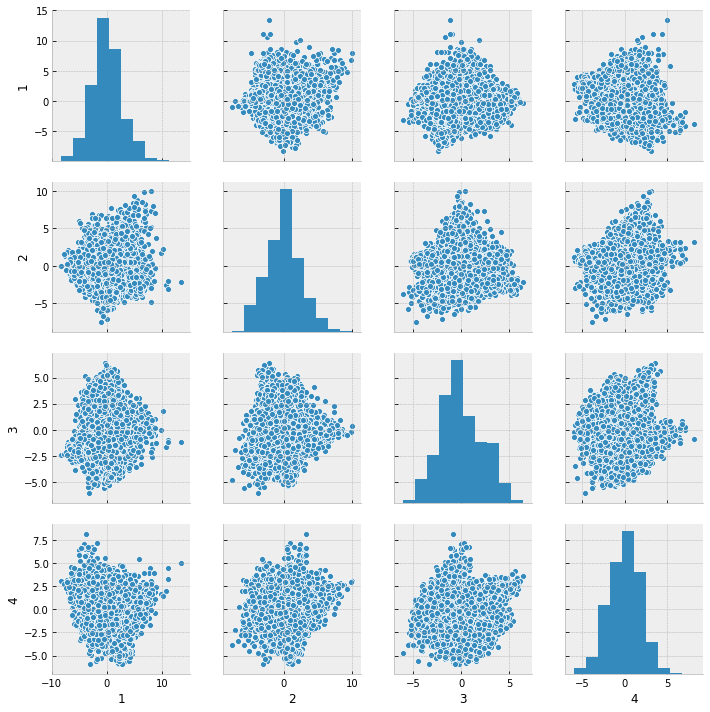

In [70]:
df = pd.DataFrame(X_pca, columns=range(1, X_pca.shape[1]+1))
ax = sns.pairplot(df, x_vars=df.columns[:4], y_vars=df.columns[:4])

## ICA

In [25]:
ica = FastICA(n_components=10, max_iter=200, random_state=0)
ica.fit(X)
X_ica = ica.fit_transform(X)

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [26]:
kurtosis(X_ica)

array([ -0.68902559,  -0.23461233,   6.33715759,  -0.66562914,
        10.35752458,  -1.04252366, 122.84765728,  -0.92579243,
        51.69200697,  -0.72958366])

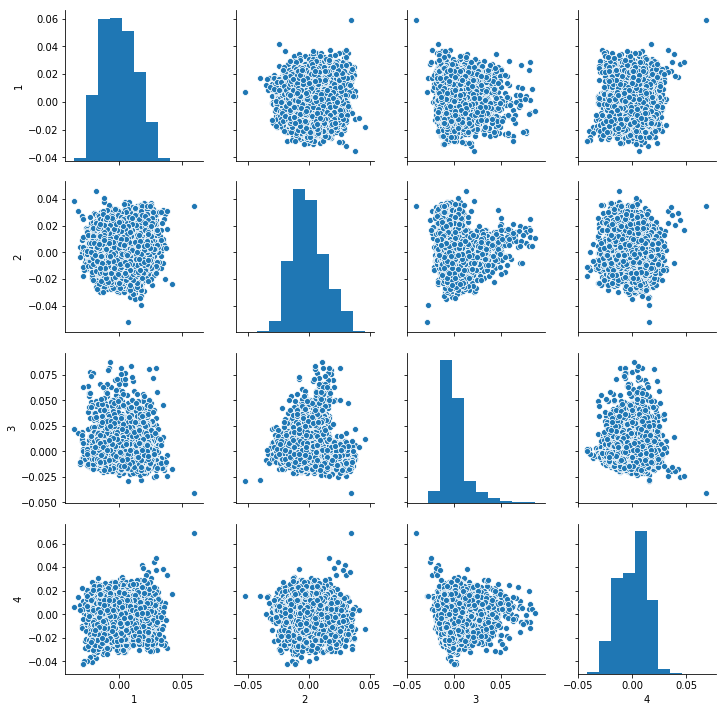

In [27]:
df = pd.DataFrame(X_ica, columns=range(1, X_ica.shape[1]+1))
ax = sns.pairplot(df, x_vars=df.columns[:4], y_vars=df.columns[:4])

## RP

In [39]:
transformer = GaussianRandomProjection(n_components=20, random_state=0)
X_rp = transformer.fit_transform(X)

In [533]:
# Adaboost
def rp_boost(X, y):   # numpy array required
    scores_by_sim = []
    for seed in range(3):
#         print(seed)
        scores_by_d = []
        for d in range(1, X.shape[1]+1, 5):
            rp = GaussianRandomProjection(n_components=d, random_state=seed)
            X_rp = rp.fit_transform(X)
            rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
            acc = []
            for train_idx, cv_idx in rs.split(X_rp):
                X_train, X_cv = X_rp[train_idx, :], X_rp[cv_idx, :]
                y_train, y_cv = y[train_idx], y[cv_idx]

                dst = DecisionTreeClassifier(max_depth=16, criterion='gini')
                clf = AdaBoostClassifier(base_estimator=dst, n_estimators=10, learning_rate=1)
                clf.fit(X_train, y_train)
                y_prob = clf.predict(X_cv)

                acc.append(accuracy_score(y_cv, y_prob))
            score = np.mean(np.array(acc))
            scores_by_d.append(score)
        scores_by_sim.append(scores_by_d)
    return scores_by_sim

In [534]:
%%time
scores = rp_boost(X.values, y.values)

0
1
2
CPU times: user 6min 10s, sys: 3.04 s, total: 6min 13s
Wall time: 6min 28s


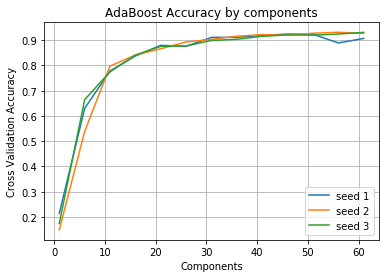

In [536]:
plt.plot(range(1, X.shape[1]+1, 5), np.transpose(np.array(scores)))
plt.title('AdaBoost Accuracy by components')
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.legend(['seed 1', 'seed 2', 'seed 3'])
plt.grid(True)

In [550]:
# NN
def rp_nn(X, y):   # numpy array required
    y_binary = to_categorical(y)
    
    scores_by_sim = []
    for seed in range(3):
        print(seed)
        scores_by_d = []
        for d in range(1, X.shape[1]+1, 5):
            rp = GaussianRandomProjection(n_components=d, random_state=seed)
            X_rp = rp.fit_transform(X)
            rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
            acc = []
            for train_idx, cv_idx in rs.split(X_rp):
                X_train, X_cv = X_rp[train_idx, :], X_rp[cv_idx, :]
                y_train, y_cv = y_binary[train_idx, :], y_binary[cv_idx, :]

                K.clear_session()
                model = Sequential()
                model.add(Dense(30, activation='relu', name="hidden_1", input_dim=X_rp.shape[1]))
                model.add(Dense(10, activation='softmax', name="op"))
                model.compile(optimizer=Adam(lr=1e-2), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

                history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=10, batch_size=256, verbose=0)
                acc.append(history.history['val_categorical_accuracy'][-1])

            score = np.mean(np.array(acc))
            scores_by_d.append(score)
        scores_by_sim.append(scores_by_d)
    return scores_by_sim

In [551]:
%%time
scores = rp_nn(X.values, y.values)

0
1
2
CPU times: user 7min 29s, sys: 16.8 s, total: 7min 45s
Wall time: 5min 22s


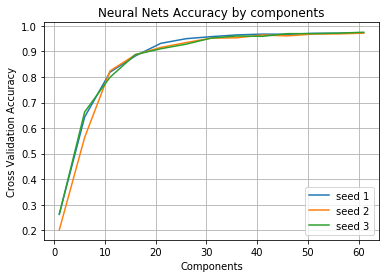

In [552]:
plt.plot(range(1, X.shape[1]+1, 5), np.transpose(np.array(scores)))
plt.title('Neural Nets Accuracy by components')
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.legend(['seed 1', 'seed 2', 'seed 3'])
plt.grid(True)

## Feature selection algorithm - Information Gain in Decision Tree

In [40]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)

model = SelectFromModel(clf, threshold='mean', prefit=True)
X_ig = model.transform(X)      # for following clustering
X_ig.shape    

[0.         0.         0.00632071 0.00266529 0.00902889 0.04659534
 0.00070658 0.         0.         0.00404167 0.02209157 0.00233297
 0.01110939 0.00865607 0.00172546 0.         0.         0.00238681
 0.02679364 0.02156646 0.05977186 0.10403094 0.00160795 0.
 0.00039017 0.00114022 0.04489652 0.08025042 0.00699405 0.00308554
 0.01099095 0.         0.         0.04540828 0.0160276  0.00589547
 0.07009658 0.02163161 0.00580994 0.         0.         0.00172241
 0.12482979 0.04961519 0.01414433 0.00979929 0.00910879 0.
 0.         0.00102151 0.00461074 0.00716484 0.00427888 0.01130166
 0.02460033 0.         0.         0.00037745 0.00234645 0.00224836
 0.061954   0.02087009 0.00482806 0.00112885]


(5620, 17)

In [557]:
def ig_boost(X, y):   # numpy array required
    scores_by_d = []

    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    fi = clf.feature_importances_
    index = np.argsort(fi)[::-1]

    for d in range(1, X.shape[1]+1, 5):
        X_tf = X[:, index[:d]]

        rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
        acc = []
        for train_idx, cv_idx in rs.split(X_tf):
            X_train, X_cv = X_tf[train_idx, :], X_tf[cv_idx, :]
            y_train, y_cv = y[train_idx], y[cv_idx]

            dst = DecisionTreeClassifier(max_depth=16, criterion='gini')
            clf = AdaBoostClassifier(base_estimator=dst, n_estimators=10, learning_rate=1)
            clf.fit(X_train, y_train)
            y_prob = clf.predict(X_cv)

            acc.append(accuracy_score(y_cv, y_prob))
        score = np.mean(np.array(acc))
        scores_by_d.append(score)
    return scores_by_d

In [558]:
scores = ig_boost(X.values, y.values)

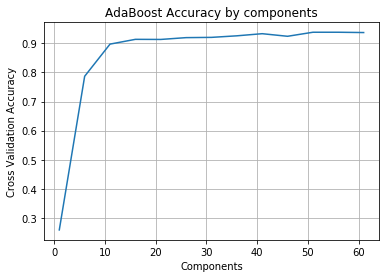

In [560]:
plt.plot(range(1, X.shape[1]+1, 5), np.transpose(np.array(scores)))
plt.title('AdaBoost Accuracy by components')
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.grid(True)
# shows there exist a lot of feature redundancy

In [563]:
def ig_nn(X, y):   # numpy array required
    y_binary = to_categorical(y)
    scores_by_d = []

    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    fi = clf.feature_importances_
    index = np.argsort(fi)[::-1]

    for d in range(1, X.shape[1]+1, 5):
        X_tf = X[:, index[:d]]

        rs = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
        acc = []
        for train_idx, cv_idx in rs.split(X_tf):
            X_train, X_cv = X_tf[train_idx, :], X_tf[cv_idx, :]
            y_train, y_cv = y_binary[train_idx, :], y_binary[cv_idx, :]

            K.clear_session()
            model = Sequential()
            model.add(Dense(30, activation='relu', name="hidden_1", input_dim=X_tf.shape[1]))
            model.add(Dense(10, activation='softmax', name="op"))
            model.compile(optimizer=Adam(lr=1e-2), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

            history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=10, batch_size=256, verbose=0)
            acc.append(history.history['val_categorical_accuracy'][-1])
        score = np.mean(np.array(acc))
        scores_by_d.append(score)
    return scores_by_d

In [564]:
scores = ig_nn(X.values, y.values)

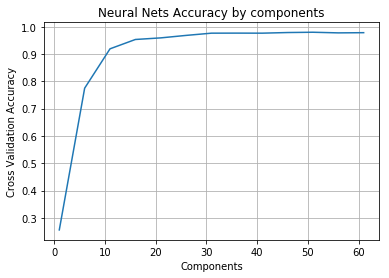

In [565]:
plt.plot(range(1, X.shape[1]+1, 5), np.transpose(np.array(scores)))
plt.title('Neural Nets Accuracy by components')
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.grid(True)

# 3. Dimensionality Reduction + Clustering

### 3.1 PCA

Text(0, 0.5, 'BSS / TSS')

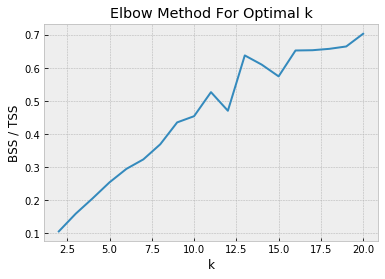

In [71]:
# Elbow Method
pes, wgs = elbow_method(X_pca, 2, 21)

plt.figure()
plt.plot(range(2, 21), pes)
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('BSS / TSS')

Optimal clusters:  17


Text(0.5, 1.0, 'Gap Values by Cluster Count')

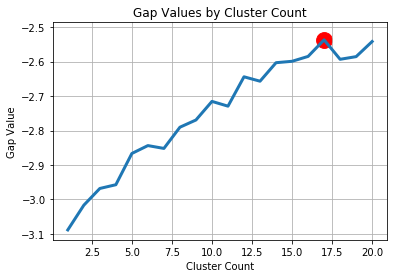

In [567]:
# Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X_pca, cluster_array=np.arange(1, 21))   # random actually
print('Optimal clusters: ', n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


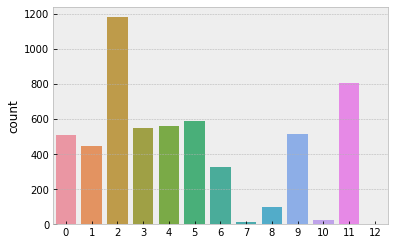

<Figure size 432x288 with 0 Axes>

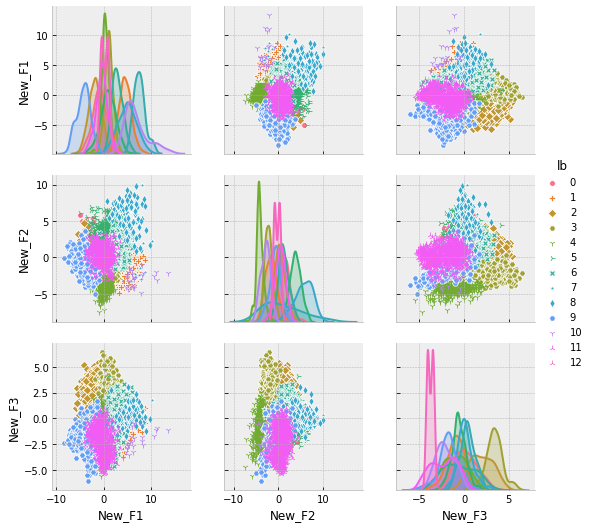

In [72]:
k = 13   # k diff, choose smaller one
clstr = KMeans(n_clusters=k, random_state=0, verbose=0)
clstr.fit(X_pca)
lb = clstr.labels_
sns.countplot(lb)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_pca[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

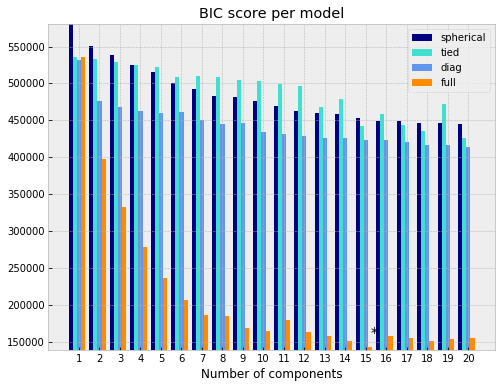

In [74]:
gauss_mix_model_selection(X_pca, k_ub=21, cv_types=['spherical', 'tied', 'diag', 'full'])

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

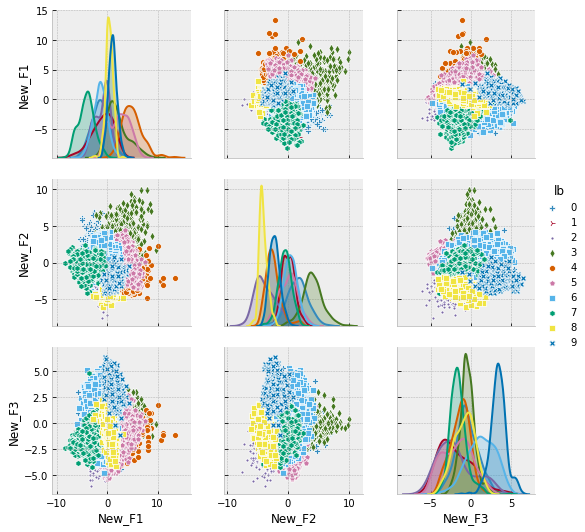

In [75]:
k = 10
gmm = GaussianMixture(n_components=k, warm_start=True)
lb_pca = gmm.fit_predict(X_pca)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_pca[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_pca
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

### 3.2 ICA

Text(0, 0.5, 'BSS / TSS')

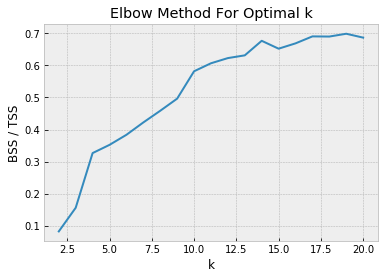

In [73]:
# Elbow Method
pes, wgs = elbow_method(X_ica, 2, 21)
plt.figure()
plt.plot(range(2, 21), pes)
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('BSS / TSS')

Optimal clusters:  20


Text(0.5, 1.0, 'Gap Values by Cluster Count')

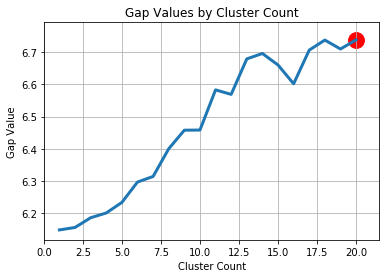

In [35]:
# Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X_ica, cluster_array=np.arange(1, 21))   # random actually
print('Optimal clusters: ', n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


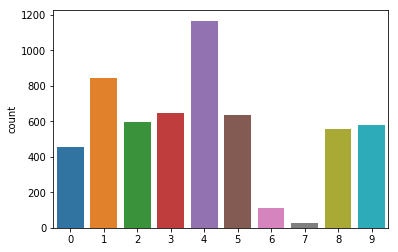

<Figure size 432x288 with 0 Axes>

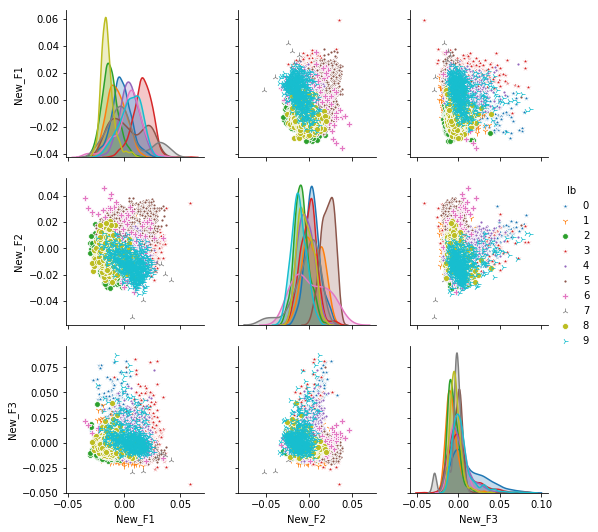

In [50]:
k = 10   # k diff, choose smaller one
clstr = KMeans(n_clusters=k, random_state=0, verbose=0)
clstr.fit(X_ica)
lb_ica = clstr.labels_
sns.countplot(lb_ica)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_ica[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_ica
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

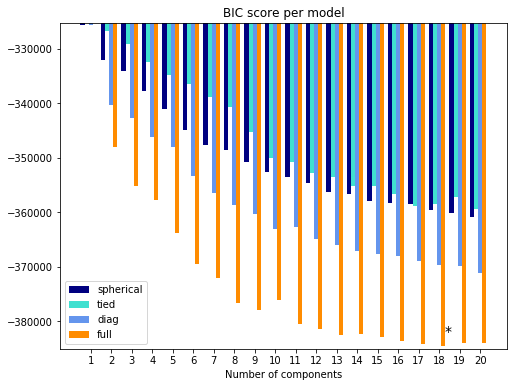

In [51]:
gauss_mix_model_selection(X_ica, k_ub=21, cv_types=['spherical', 'tied', 'diag', 'full'])

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

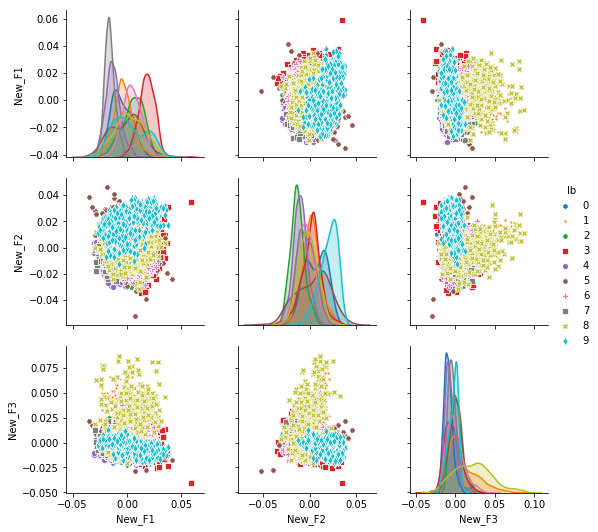

In [52]:
k = 10
gmm = GaussianMixture(n_components=k, warm_start=True)
lb_ica = gmm.fit_predict(X_ica)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_ica[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_ica
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

### 3.3 RP

Text(0, 0.5, 'BSS / TSS')

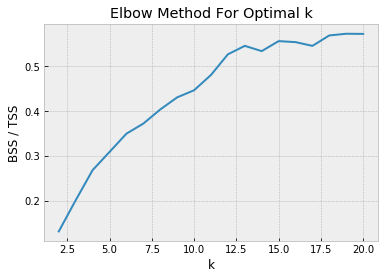

In [100]:
# Elbow Method
pes, wgs = elbow_method(X_rp, 2, 21)
plt.figure()
plt.plot(range(2, 21), pes)
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('BSS / TSS')
# k = 13

Optimal clusters:  20


Text(0.5, 1.0, 'Gap Values by Cluster Count')

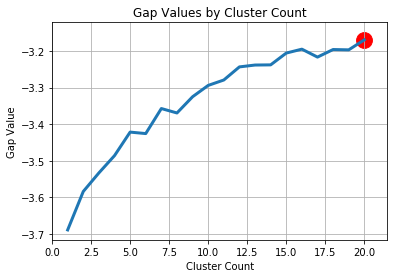

In [42]:
# Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X_rp, cluster_array=np.arange(1, 21))   # random actually
print('Optimal clusters: ', n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


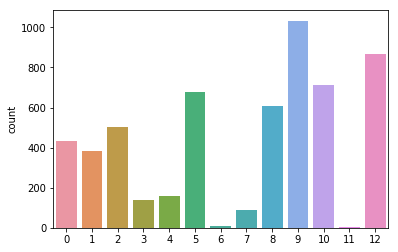

<Figure size 432x288 with 0 Axes>

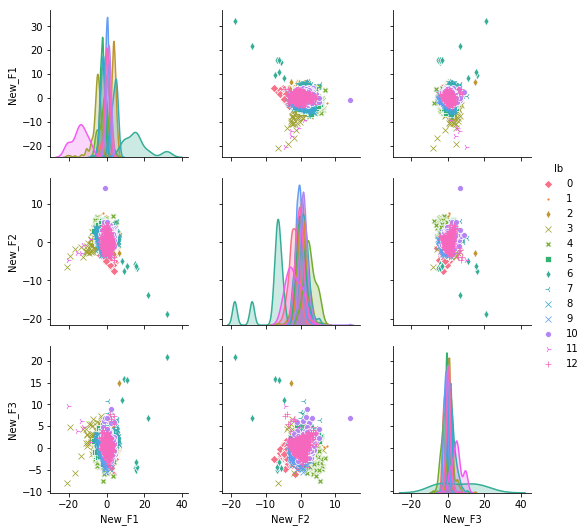

In [47]:
k = 13   # k diff, choose smaller one
clstr = KMeans(n_clusters=k, random_state=0, verbose=0)
clstr.fit(X_rp)
lb_rp = clstr.labels_
sns.countplot(lb_rp)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_rp[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_rp
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

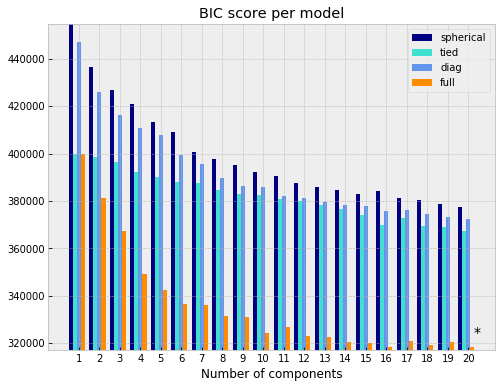

In [101]:
gauss_mix_model_selection(X_rp, k_ub=21, cv_types=['spherical', 'tied', 'diag', 'full'])

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

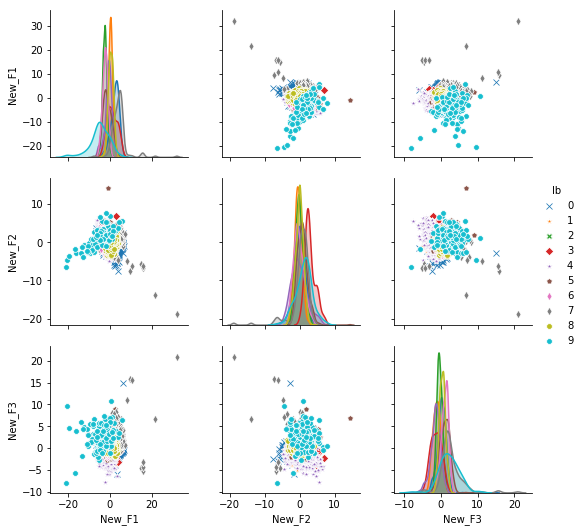

In [49]:
k = 10
gmm = GaussianMixture(n_components=k, warm_start=True)
lb_rp = gmm.fit_predict(X_rp)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_rp[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_rp
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

### 3.4 IG

Text(0, 0.5, 'BSS / TSS')

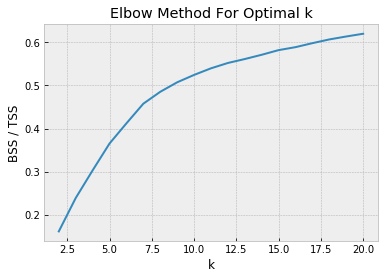

In [102]:
# Elbow Method
pes, wgs = elbow_method(X_ig, 2, 21)
plt.figure()
plt.plot(range(2, 21), pes)
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('BSS / TSS')

Optimal clusters:  19


Text(0.5, 1.0, 'Gap Values by Cluster Count')

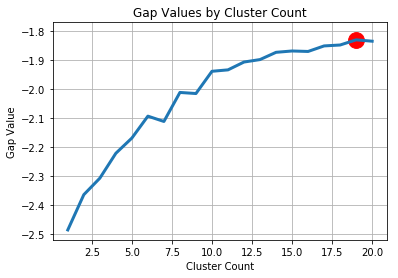

In [54]:
# Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X_ig, cluster_array=np.arange(1, 21))   # random actually
print('Optimal clusters: ', n_clusters)

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


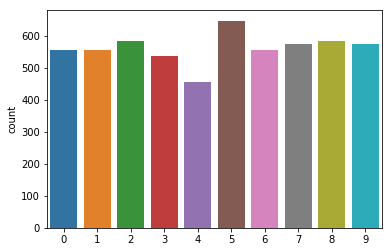

<Figure size 432x288 with 0 Axes>

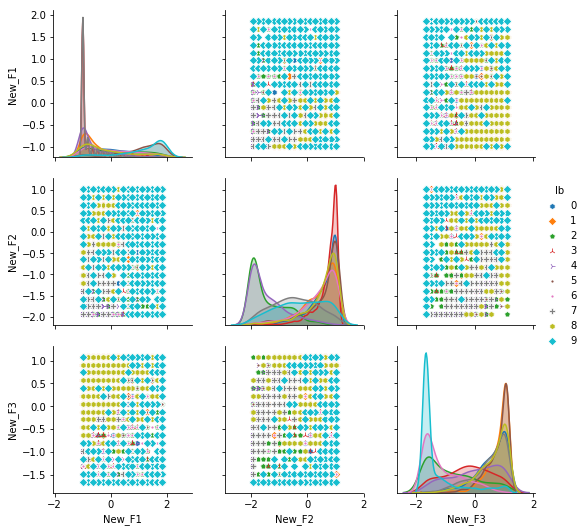

In [55]:
k = 10   # k diff, choose smaller one
clstr = KMeans(n_clusters=k, random_state=0, verbose=0)
clstr.fit(X_ig)
lb_ig = clstr.labels_
sns.countplot(lb_ig)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_ig[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_ig
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

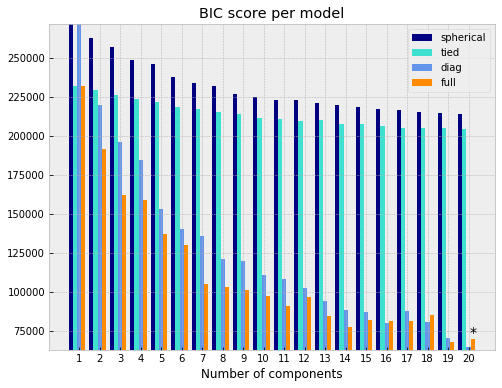

In [103]:
gauss_mix_model_selection(X_ig, k_ub=21, cv_types=['spherical', 'tied', 'diag', 'full'])

/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

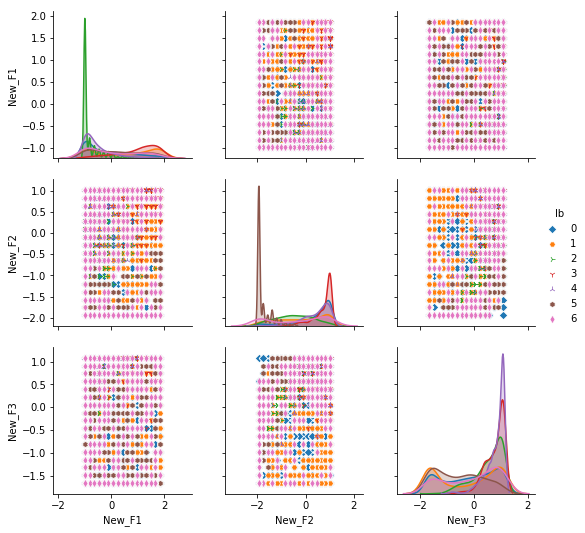

In [57]:
k = 7
gmm = GaussianMixture(n_components=k, warm_start=True)
lb_ig = gmm.fit_predict(X_ig)

# pairplot
marker_set = ['.', ',', 'o', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd']
idx = np.random.choice(range(len(marker_set)), size=k)

col_names = ['New_F1','New_F2','New_F3']
X_df = pd.DataFrame(X_ig[:, :3], columns=col_names)
X_c = X_df.copy()
X_c['lb'] = lb_ig
plt.figure()

ax = sns.pairplot(X_c, hue='lb', x_vars=col_names, y_vars=col_names, markers=[marker_set[i] for i in idx])

# 4. Dimensionality Reduction + NN Classification

In [86]:
def model_train_cv(X, y):
    y_binary = to_categorical(y)

    rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
    acc_train = []
    acc_cv = []
    loss_train = []
    loss_cv = []
    for train_idx, cv_idx in rs.split(X):
        if len(X.shape) == 1:      # for cluster + NN
            X_train, X_cv = X[train_idx], X[cv_idx]
            input_dim = 1
        else:
            X_train, X_cv = X[train_idx, :], X[cv_idx, :]
            input_dim = X.shape[1]
        y_train, y_cv = y_binary[train_idx, :], y_binary[cv_idx, :]

        K.clear_session()
        model = Sequential()
        model.add(Dense(30, activation='relu', name="hidden_1", input_dim=input_dim))
        model.add(Dense(10, activation='softmax', name="op"))
        model.compile(optimizer=Adam(lr=1e-2), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=10, batch_size=256, verbose=0)
        acc_train.append(history.history['categorical_accuracy'][-1])
        acc_cv.append(history.history['val_categorical_accuracy'][-1])
        loss_train.append(history.history['loss'][-1])
        loss_cv.append(history.history['val_loss'][-1])
        scores = np.array([acc_train, acc_cv, loss_train, loss_cv])
    return np.mean(scores, axis=1)

In [462]:
def score_by_dim(algorithm, X, y):     # d is the dimension data projected to
    if algorithm is GaussianRandomProjection:
        scores = []
        for d in range(1, X.shape[1]+1):
            print(d)
            algo = algorithm(n_components=d)
            X_algo = algo.fit_transform(X)
            scores.append(model_train_cv(X_algo, y))
#             print(scores)
        return scores
    elif algorithm is DecisionTreeClassifier:
        clf = algorithm()
        print(clf)
        clf.fit(X, y)
        fi = clf.feature_importances_
        index = np.argsort(fi)[::-1]

        scores = []
        for d in range(1, X.shape[1]+1):
            X_algo = X[:, index[:d]]
            scores.append(model_train_cv(X_algo, y))
        return scores

    algo = algorithm(n_components=X.shape[1])   # , max_iter=500, tol=1
    algo.fit(X)
    scores = []

    for d in range(1, X.shape[1]+1):
        print(d)
        X_algo = np.dot(X, np.transpose(algo.components_[:d, :]))
        scores.append(model_train_cv(X_algo, y))
#         print(scores)
    return scores

In [ ]:
# test code

# %%time
# score_by_k = []
# for k in range(1, X.shape[1]+1):
#     pca = PCA(n_components=k)
#     X_pca = pca.fit_transform(X)
#     score_by_k.append(model_train_cv(X_pca, y))
# score_by_k

%%time   # 25 min total
pca = PCA(n_components=X.shape[1])
pca.fit(X)
score_by_k = []

for k in range(1, X.shape[1]+1):
    print(k)
    X_pca = np.dot(X, np.transpose(pca.components_[:k, :]))
    score_by_k.append(model_train_cv(X_pca, y))

plt.plot(range(1, score_by_k.shape[0]+1), score_by_k)
plt.xlim([0, 70])
plt.ylim([0.35, 1.1])
plt.axhline(y=score_by_k[-1], linestyle='--', color='orange')

%%time
pca = PCA(n_components=X.shape[1])
pca.fit(X)
X_pca = np.dot(X, np.transpose(pca.components_[:10, :]))
model_train_cv(X_pca, y)

%%time
pca = PCA(n_components=X.shape[1])
pca.fit(X)
X_pca = np.dot(X, np.transpose(pca.components_[:, :]))
model_train_cv(X_pca, y)

In [ ]:
%%time
scores_pca =  score_by_dim(PCA, X, y)

In [ ]:
%%time
scores_ica = score_by_dim(FastICA, X, y)

In [ ]:
%%time
scores_rp = score_by_dim(GaussianRandomProjection, X, y)

In [324]:
%%time
scores_ig = score_by_dim(DecisionTreeClassifier, X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
CPU times: user 28min 30s, sys: 1min 1s, total: 29min 32s
Wall time: 23min 23s


In [460]:
scores_pca = np.array(scores_pca)
scores_ica = np.array(scores_ica)
scores_rp = np.array(scores_rp)
scores_ig = np.array(scores_ig)

In [438]:
print(scores_ig[:, 1].argmax())
scores_ig[:, 1].max()

58


0.9791814955528094

In [97]:
# calculate the accuracy of NN trained by original features
scores = model_train_cv(X.values, y.values)
orig_tr_acc = scores[0]
orig_cv_acc = scores[1]

NameError: name 'scores_pca' is not defined

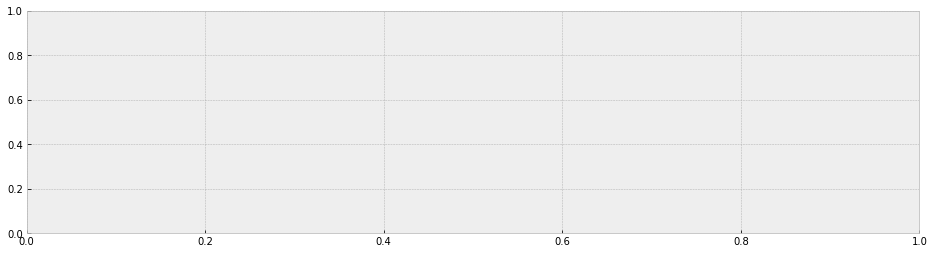

In [95]:
plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.plot(range(1, X.shape[1]+1), scores_pca[:, 1], color='navy')
plt.plot(range(1, X.shape[1]+1), scores_rp[:, 1], color='slategrey')
plt.plot(range(1, X.shape[1]+1), scores_ig[:, 1], color='orangered')
plt.plot(range(1, X.shape[1]+1), scores_ica[:, 1], color='magenta')


plt.scatter(20, scores_pca[19, 1], s=50, c='r')
plt.scatter(40, scores_rp[39, 1], s=50, c='r')
plt.scatter(59, scores_ig[58, 1], s=50, c='r')

plt.axhline(y=orig_acc, linestyle='--', color='orange')

plt.legend(['PCA', 'RP', 'IG', 'ICA'])
plt.xlim([0, 70])
plt.ylim([0.1, 1.1])
plt.grid(True)
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.title('Classification Accuracy by reduced dimension')

#-----------------------------------------------------------------# 
plt.subplot(212)
plt.plot(range(1, X.shape[1]+1), scores_pca[:, 1], color='navy')
plt.plot(range(1, X.shape[1]+1), scores_rp[:, 1], color='slategrey')
plt.plot(range(1, X.shape[1]+1), scores_ig[:, 1], color='orangered')

plt.scatter(20, scores_pca[19, 1], s=50, c='r')
plt.text(19, 0.97, f'{scores_pca[19, 1]:.4f}', fontsize=12)
plt.scatter(40, scores_rp[39, 1], s=50, c='r')
plt.text(39, 0.94, f'{scores_rp[39, 1]:.4f}', fontsize=12)
plt.scatter(59, scores_ig[58, 1], s=50, c='r')
plt.text(58, 0.99, f'{scores_ig[58, 1]:.4f}', fontsize=12)
plt.axhline(y=orig_cv_acc, linestyle='--', color='orange')
plt.text(5, orig_cv_acc, f'{orig_cv_acc:.4f}', fontsize=12)


plt.legend(['PCA', 'RP', 'IG'])
plt.xlim([0, 70])
plt.ylim([0.85, 1.1])
plt.grid(True)
plt.xlabel('Components')
plt.ylabel('Cross Validation Accuracy')
plt.title('Classification Accuracy by reduced dimension')

In [344]:
scores_pca[19, 0] # training acc
scores_pca[19, 1] # cv acc
scores_rp[39, 0] # training acc
scores_rp[39, 1] # cv acc
scores_ica[-1, 0]
scores_ica[-1, 1]
training_acc = (orig_tr_acc, scores_pca[19, 0], scores_rp[39, 0], scores_ig[58, 0])
cv_acc = (orig_cv_acc, scores_pca[19, 1], scores_rp[39, 1], scores_ig[58, 1])

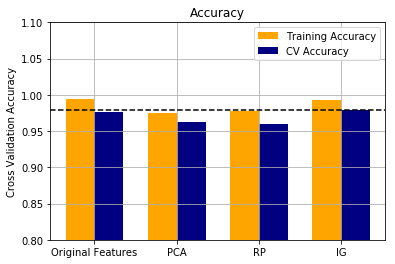

In [348]:
N = 4
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, training_acc, width, color='orange', bottom=0)
p2 = ax.bar(ind + width, cv_acc, width, color='navy', bottom=0)
ax.axhline(y=scores_ig[58, 1], linestyle='--', color='black')

ax.set_title('Accuracy')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Original Features', 'PCA', 'RP', 'IG'))
ax.set_ylabel('Cross Validation Accuracy')
ax.set_ylim([0.8, 1.1])
ax.grid(True)
ax.legend((p1[0], p2[0]), ('Training Accuracy', 'CV Accuracy'))
ax.autoscale_view()

In [276]:
%%time
_ = model_train_cv(X, y)
# Time for NN (no dim red)

CPU times: user 29.6 s, sys: 1.06 s, total: 30.6 s
Wall time: 25.6 s


In [277]:
%%time
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
# Time for PCA

CPU times: user 78.5 ms, sys: 21.8 ms, total: 100 ms
Wall time: 90.2 ms


In [278]:
%%time
_ = model_train_cv(X_pca, y)
# Time for NN (after PCA)

CPU times: user 25.3 s, sys: 1.03 s, total: 26.3 s
Wall time: 20.7 s


In [279]:
%%time
rp = GaussianRandomProjection(n_components=40)
X_rp = rp.fit_transform(X)
# Time for RP

CPU times: user 5.91 ms, sys: 2.92 ms, total: 8.83 ms
Wall time: 11.9 ms


In [280]:
%%time
_ = model_train_cv(X_rp, y)
# Time for NN (after RP)

CPU times: user 27.2 s, sys: 1.02 s, total: 28.2 s
Wall time: 22.9 s


In [281]:
%%time
ica = FastICA(n_components=X.shape[1])
X_ica = ica.fit_transform(X)
# Time for ICA

CPU times: user 3.21 s, sys: 378 ms, total: 3.59 s
Wall time: 2 s


/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [282]:
%%time
_ = model_train_cv(X_ica, y)

CPU times: user 28.8 s, sys: 1.04 s, total: 29.8 s
Wall time: 23.9 s


In [357]:
%%time
clf = DecisionTreeClassifier()
clf.fit(X, y)
fi = clf.feature_importances_
index = np.argsort(fi)[::-1]
X_ig = X[:, index[:59]]
# Time for IG

CPU times: user 89.5 ms, sys: 3.85 ms, total: 93.4 ms
Wall time: 112 ms


In [358]:
%%time
_ = model_train_cv(X_ig, y)

CPU times: user 29.2 s, sys: 1.04 s, total: 30.3 s
Wall time: 25.9 s


In [359]:
# collect wall time
dim_red_time = (0, 90.2, 11.9, 112)
nn_time = (25.6, 20.7, 22.9, 25.9)

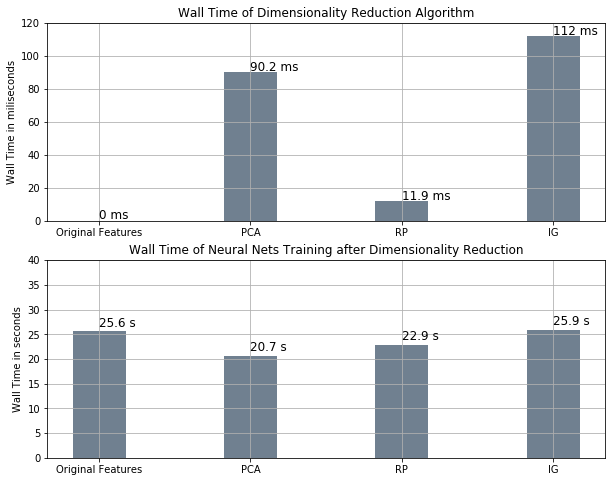

In [361]:
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

plt.figure(figsize=(10, 8))
ax = plt.subplot(211)
ax.bar(ind, dim_red_time, width, color='slategrey', bottom=0)
ax.text(0, dim_red_time[0]+1, f'{dim_red_time[0]} ms', fontsize=12)
ax.text(1, dim_red_time[1]+1, f'{dim_red_time[1]} ms', fontsize=12)
ax.text(2, dim_red_time[2]+1, f'{dim_red_time[2]} ms', fontsize=12)
ax.text(3, dim_red_time[3]+1, f'{dim_red_time[3]} ms', fontsize=12)

ax.set_title('Wall Time of Dimensionality Reduction Algorithm')
ax.set_xticks(ind)
ax.set_xticklabels(('Original Features', 'PCA', 'RP', 'IG'))
ax.set_ylabel('Wall Time in miliseconds')
ax.set_ylim([0, 120])
ax.grid(True)

ax = plt.subplot(212)
ax.bar(ind, nn_time, width, color='slategrey', bottom=0)
ax.text(0, nn_time[0]+1, f'{nn_time[0]} s', fontsize=12)
ax.text(1, nn_time[1]+1, f'{nn_time[1]} s', fontsize=12)
ax.text(2, nn_time[2]+1, f'{nn_time[2]} s', fontsize=12)
ax.text(3, nn_time[3]+1, f'{nn_time[3]} s', fontsize=12)

ax.set_title('Wall Time of Neural Nets Training after Dimensionality Reduction')
ax.set_xticks(ind)
ax.set_xticklabels(('Original Features', 'PCA', 'RP', 'IG'))
ax.set_ylabel('Wall Time in seconds')
ax.set_ylim([0, 40])
ax.grid(True)

# Clustering + NN Classification

In [ ]:
# original features
# original features + K-Means
# original features + EM

# original features
# original features + cluster(PCA)
    # original features + K-Means
    # original features + EM
# original features + cluster(RP)
    # original features + K-Means
    # original features + EM
# original features + cluster(IG)
    # original features + K-Means
    # original features + EM

In [80]:
def score_by_cluster(algorithm, X, y, cl_only=False):
    scores = []
    for k in range(2, 11):
        if algorithm is KMeans:
            clstr = algorithm(n_clusters=k, random_state=0, verbose=0)    
            clstr.fit(X)
            lb = clstr.labels_
        elif algorithm is GaussianMixture:
                gmm = GaussianMixture(n_components=k)
                lb = gmm.fit_predict(X)
        lb = (lb - np.mean(lb)) / np.std(lb)   # std
        if cl_only:
            scores.append(model_train_cv(lb, y.values))
        else:
            X['lb'] = lb
            scores.append(model_train_cv(X.values, y.values))
    return scores

In [81]:
clstr = KMeans(n_clusters=5, random_state=0, verbose=0)
clstr.fit(X)
lb = clstr.labels_

In [82]:
lb

array([4, 4, 3, ..., 0, 1, 1], dtype=int32)

In [83]:
lb = (lb - np.mean(lb)) / np.std(lb)

In [84]:
y.values

array([0, 0, 7, ..., 8, 9, 8])

In [87]:
%%time
scores_km = score_by_cluster(KMeans, X, y)

CPU times: user 4min 28s, sys: 12.3 s, total: 4min 40s
Wall time: 3min 34s


In [88]:
%%time
scores_em = score_by_cluster(GaussianMixture, X, y)

CPU times: user 4min 50s, sys: 15.3 s, total: 5min 6s
Wall time: 3min 41s


In [89]:
scores_km = np.array(scores_km)
scores_em = np.array(scores_em)

In [90]:
scores_km_cl = score_by_cluster(KMeans, X, y, cl_only=True)
scores_em_cl = score_by_cluster(GaussianMixture, X, y, cl_only=True)

scores_km_cl = np.array(scores_km_cl)
scores_em_cl = np.array(scores_em_cl)

Text(0.5, 1.0, 'Accuracy by K (clusters only)')

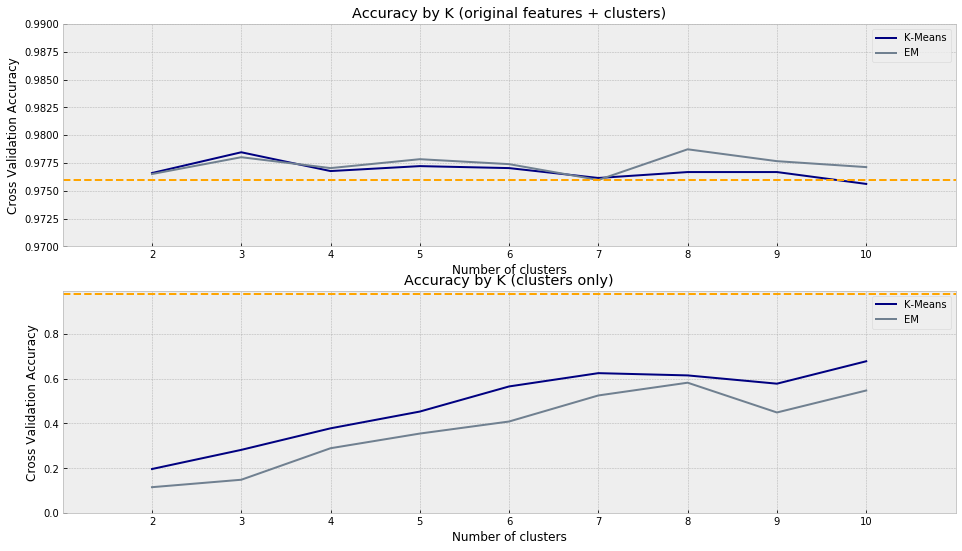

In [94]:
ind = range(2, 11)

plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.plot(ind, scores_km[:, 1], color='navy')
plt.plot(ind, scores_em[:, 1], color='slategrey')

plt.axhline(y=0.976, linestyle='--', color='orange')

plt.legend(['K-Means', 'EM'])
plt.xticks(ind)
plt.xlim([1, 11])
plt.ylim([0.97, 0.99])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy by K (original features + clusters)')

# #----------------------------------------#
plt.subplot(212)
plt.plot(ind, scores_km_cl[:, 1], color='navy')
plt.plot(ind, scores_em_cl[:, 1], color='slategrey')

plt.axhline(y=0.976, linestyle='--', color='orange')

plt.legend(['K-Means', 'EM'])
plt.xticks(ind)
plt.xlim([1, 11])
plt.ylim([0, 0.99])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy by K (clusters only)')

In [98]:
training_acc = (orig_tr_acc, scores_km[0, 0], scores_em[1, 0], scores_km_cl[-2, 0], scores_em_cl[-3, 0])
cv_acc = (orig_cv_acc, scores_km[0, 1], scores_em[1, 1], scores_km_cl[-2, 1], scores_em_cl[-3, 1])

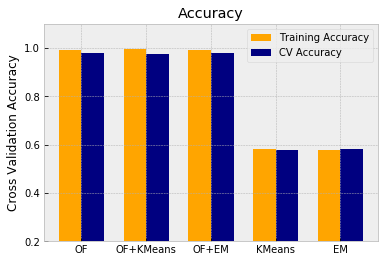

In [99]:
N = 5
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, training_acc, width, color='orange', bottom=0)
p2 = ax.bar(ind + width, cv_acc, width, color='navy', bottom=0)
# ax.axhline(y=scores_ig[58, 1], linestyle='--', color='black')

ax.set_title('Accuracy')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('OF', 'OF+KMeans', 'OF+EM', 'KMeans', 'EM'))
ax.set_ylabel('Cross Validation Accuracy')
ax.set_ylim([0.2, 1.1])
ax.grid(True)
ax.legend((p1[0], p2[0]), ('Training Accuracy', 'CV Accuracy'))
ax.autoscale_view()